<a href="https://colab.research.google.com/github/gnikhilchand/deepl-learning-cifar-10/blob/main/Cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
torch.manual_seed(42)

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True, num_workers=2)


100%|██████████| 170498071/170498071 [00:12<00:00, 13374285.42it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)


Files already downloaded and verified


In [ ]:
print(f'Number of images in the training dataset: {len(trainset)}')

Number of images in the training dataset: 50000


In [ ]:
sample_image, _ = trainset[0]

# Print the shape of the sample image
print(f'Shape of a sample image: {sample_image.shape}')

Shape of a sample image: torch.Size([3, 32, 32])


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # First convolutional layer: 3 input channels, 6 output channels, 5x5 kernel
        self.conv1 = nn.Conv2d(3, 6, 5)
        # Max pooling layer: 2x2 kernel, stride 2
        self.pool = nn.MaxPool2d(2, 2)
        # Second convolutional layer: 6 input channels, 16 output channels, 5x5 kernel
        self.conv2 = nn.Conv2d(6, 16, 5)
        # First fully connected layer: 16*5*5 input features, 120 output features
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        # Second fully connected layer: 120 input features, 84 output features
        self.fc2 = nn.Linear(120, 84)
        # Third fully connected layer: 84 input features, 10 output features
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Apply first convolutional layer, ReLU activation, and max pooling
        x = self.pool(F.relu(self.conv1(x)))
        # Apply second convolutional layer, ReLU activation, and max pooling
        x = self.pool(F.relu(self.conv2(x)))
        # Flatten the output
        x = x.view(-1, 16 * 5 * 5)
        # Pass through first fully connected layer with ReLU activation
        x = F.relu(self.fc1(x))
        # Pass through second fully connected layer with ReLU activation
        x = F.relu(self.fc2(x))
        # Pass through third fully connected layer (output layer)
        x = self.fc3(x)
        return x

# Instantiate the network
net = Net()

# Calculate the total number of parameters
total_params = sum(p.numel() for p in net.parameters())
print(f'Total number of parameters: {total_params}')


Total number of parameters: 62006


In [ ]:
import torch.optim as optim

# Initialize the network
net = Net()

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Initialize the optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# Get a batch of training data
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Zero the parameter gradients
optimizer.zero_grad()

# Forward pass
outputs = net(images)

# Calculate the loss
loss = criterion(outputs, labels)

# Print the initial loss value
print(f'Initial loss value: {loss.item()}')


Initial loss value: 2.310018539428711


In [ ]:
# Initialize the network
net = Net()

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Initialize the optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# Training the network
for epoch in range(2):  # Loop over the dataset for 2 epochs
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Update parameters
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # Print every 100 mini-batches
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')

# Check the loss value after 2 epochs
print(f'Final loss value after 2 epochs: {loss.item()}')

[Epoch 1, Batch 100] loss: 2.299
[Epoch 1, Batch 200] loss: 2.181
[Epoch 1, Batch 300] loss: 1.930
[Epoch 1, Batch 400] loss: 1.765
[Epoch 1, Batch 500] loss: 1.655
[Epoch 2, Batch 100] loss: 1.601
[Epoch 2, Batch 200] loss: 1.511
[Epoch 2, Batch 300] loss: 1.503
[Epoch 2, Batch 400] loss: 1.465
[Epoch 2, Batch 500] loss: 1.411
Finished Training
Final loss value after 2 epochs: 1.517909049987793


In [ ]:
# Function to evaluate the network on the test dataset
def evaluate_model(net, testloader):
    correct = 0
    total = 0
    with torch.no_grad():  # Disable gradient tracking
        for data in testloader:
            images, labels = data
            outputs = net(images)  # Forward pass
            _, predicted = torch.max(outputs.data, 1)  # Get predicted labels
            total += labels.size(0)  # Update total count of test samples
            correct += (predicted == labels).sum().item()  # Count correct predictions

    accuracy = 100 * correct / total  # Calculate accuracy
    return accuracy

# Evaluate the network
accuracy = evaluate_model(net, testloader)
print(f'Accuracy of the network on the test dataset: {accuracy:.2f}%')

Accuracy of the network on the test dataset: 49.37%


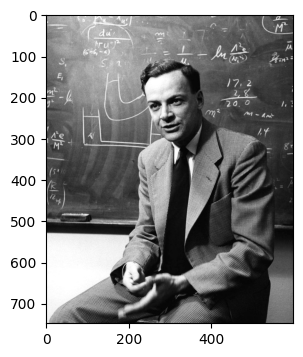

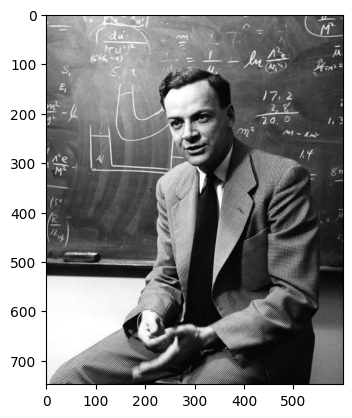

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage import io

#Read and d i s p l a y t h e image

X = io.imread('https://caltech-prod.s3.amazonaws.com/main/images/feynman01-NEWS-WEB.width-600_tSwRQP5.jpg')

X = cv2.cvtColor(X, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(6,4))
plt.imshow(X,cmap='gray')
plt.show()


#D e f i n e k e r n e l s ( v a r y t h e s i z e by c h a n g i n m = 3
n=1
m=1
K = (1/(m*n))*np.ones((m,n))
O = cv2.filter2D(X,ddepth=-1,kernel=K)
plt.imshow(O,cmap='gray')
plt.show()